<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
import pandas as pd

# Загружаем данные с использованием разделителя ';'
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Выводим размерность таблицы
print(df.shape)

(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
import pandas as pd

# Загружаем данные с использованием разделителя ';'
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Выводим первые 5 строк
print("Первые 5 строк:")
print(df.head())

# Выводим последние 5 строк
print("nПоследние 5 строк:")
print(df.tail())

# Проверяем формат признака "Пол, возраст"
print("nФормат признака 'Пол, возраст':")
print(df['Пол, возраст'].head())


Первые 5 строк:
                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , гот

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
# Импортируем необходимые библиотеки
import pandas as pd

# Загружаем данные с использованием разделителя ';'
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Выводим информацию о датасете
display(df.info())

# Выбираем признаки с пропусками
missing = df.columns[df.isnull().any()]

# Выводим признаки с пропусками
display(missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

Index(['Опыт работы', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность'],
      dtype='object')

5. Выведите основную статистическую информацию о столбцах.


In [5]:
# Импортируем необходимые библиотеки
import pandas as pd

# Загружаем данные с использованием разделителя ';'
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Выводим количество уникальных значений в столбце "Опыт работы"
unique_experience_count = df['Опыт работы'].nunique()
display(unique_experience_count)

# Находим самую распространённую должность
most_common_position = df['Последняя/нынешняя должность'].mode()[0]
display(most_common_position)

44413

'Системный администратор'

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
# Импортируем необходимые библиотеки
import pandas as pd

# Загружаем данные с использованием разделителя ';'
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Функция преобразования признака "Образование и ВУЗ"
def extract_education(text):
    words = text.split()
    education = ' '.join(words[:3])  # Берем первые три слова
    if 'Высшее образование' in education:
        return 'высшее'
    elif 'Неоконченное высшее образование' in education:
        return 'неоконченное высшее'
    elif 'Среднее специальное образование' in education:
        return 'среднее специальное'
    else:
        return 'среднее'

# Создаем новый признак "Образование"
df['Образование'] = df['Образование и ВУЗ'].apply(extract_education)

# Удаляем признак "Образование и ВУЗ"
df.drop('Образование и ВУЗ', axis=1, inplace=True)

# Проверяем уникальные значения в новом признаке "Образование"
unique_education = df['Образование'].unique()
display(unique_education)

# Подсчитываем количество соискателей со средним образованием
count_среднее = df['Образование'].value_counts().get('среднее', 0)

# Выводим результат
display(f"Количество соискателей со средним образованием: {count_среднее}")

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

'Количество соискателей со средним образованием: 559'

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
# Импортируем необходимые библиотеки
import pandas as pd
import re

# Загружаем данные
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Функция преобразования признака "Пол, возраст"
def extract_gender_age(text):
    """
    Извлекает пол и возраст из строки.

    Args:
        text: Строка, содержащая информацию о поле, возрасте и дате рождения.

    Returns:
        Кортеж (пол, возраст).
    """
    words = text.split(', ')
    gender = 'М' if 'Мужчина' in words[0] else 'Ж'
    
    # Используем регулярное выражение для извлечения возраста
    match = re.search(r'\d+', words[1])
    age = int(match.group(0)) if match else None
    
    return gender, age

# Создаем новые признаки "Пол" и "Возраст"
df['Пол'], df['Возраст'] = zip(*df['Пол, возраст'].apply(extract_gender_age))

# Удаляем признак "Пол, возраст"
df.drop('Пол, возраст', axis=1, inplace=True)

# Подсчитываем количество женских резюме
count_female = df['Пол'].value_counts().get('Ж', 0)

# Вычисляем процент женских резюме
percent_female = (count_female / len(df)) * 100
percent_female = round(percent_female, 2)

# Вычисляем средний возраст
average_age = round(df['Возраст'].mean(), 1)

# Выводим результаты
display(f"Процент женских резюме: {percent_female}%")
display(f"Средний возраст соискателей: {average_age}")

'Процент женских резюме: 19.07%'

'Средний возраст соискателей: 32.2'

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
import pandas as pd
import numpy as np
import re

# Загружаем данные
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

def get_experience(arg):
    """
    Извлекает общий опыт работы в месяцах из строки.

    Args:
        arg: Строка, содержащая информацию о опыте работы.

    Returns:
        Общий опыт работы в месяцах или NaN.
    """
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)

# Применяем функцию к столбцу "Опыт работы"
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience)
df = df.drop('Опыт работы', axis=1)

# Вычисляем медианный опыт работы, исключая пропуски
median_experience = df['Опыт работы (месяц)'].dropna().median() 

# Выводим результаты
display(df)
print(f"Медианный опыт работы (в месяцах): {median_experience}")

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Опыт работы (месяц)
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль,202.0
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано,233.0
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано,123.0
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано,225.0
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано,91.0
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано,84.0
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано,257.0
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль,46.0


Медианный опыт работы (в месяцах): 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
import pandas as pd
import re

# Загружаем данные
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 
                      'Ростов-на-Дону', 'Уфа', 'Красноярск', 
                      'Пермь', 'Воронеж', 'Волгоград']
    
    city = arg.split(' , ')[0].strip()
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

def get_ready_to_move(arg):
    if re.search(r'не готов(а)? к переезду|не хочу переехать', arg):
        return False
    elif re.search(r'готов(а)? к переезду|хочу переехать', arg):
        return True
    else:
        return False  # Если нет информации, считаем не готовым

def get_ready_for_business_trips(arg):
    if re.search(r'не готов(а)? к командировкам', arg):
        return False
    elif re.search(r'готов(а)? к командировкам|готов(а)? к редким командировкам', arg):
        return True
    else:
        return False  # Если нет информации, считаем не готовым

# Применяем функции
df['Город'] = df['Город, переезд, командировки'].apply(get_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(get_ready_to_move)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(get_ready_for_business_trips)

# Удаляем ненужный столбец
df = df.drop('Город, переезд, командировки', axis=1)

# Рассчитываем проценты
petersburg_percentage = (df['Город'].value_counts(normalize=True).get('Санкт-Петербург', 0) * 100)
both_ready_percentage = (df[(df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)].shape[0] / df.shape[0]) * 100

# Округляем до целого
petersburg_percentage = round(petersburg_percentage)
both_ready_percentage = round(both_ready_percentage)

# Выводим результаты
print(f"Процент соискателей, живущих в Санкт-Петербурге: {petersburg_percentage}%")
print(f"Процент соискателей, готовых одновременно и к переездам, и к командировкам: {both_ready_percentage}%")

Процент соискателей, живущих в Санкт-Петербурге: 11%
Процент соискателей, готовых одновременно и к переездам, и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
import pandas as pd

# Загружаем данные
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 
                  'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения информации о городе
def extract_city(text):
    city = text.split(', ')[0].strip()
    if city == 'Москва' or city == 'Санкт-Петербург':
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# Функция для извлечения информации о готовности к переезду
def extract_relocation(text):
    return 'готов к переезду' in text or 'готова к переезду' in text

# Функция для извлечения информации о готовности к командировкам
def extract_business_trips(text):
    return any(x in text for x in ['готов к командировкам', 'готова к командировкам', 'готов к редким командировкам', 'готова к редким командировкам'])

# Функция для One Hot Encoding для занятости и графика
def one_hot_encode_employment(text):
    employment_types = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
    return {employment: (employment in text) for employment in employment_types}

def one_hot_encode_schedule(text):
    schedule_types = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
    return {schedule: (schedule in text) for schedule in schedule_types}

# Применяем функции
df['Город'] = df['Город, переезд, командировки'].apply(extract_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(extract_relocation)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(extract_business_trips)

# Применяем One Hot Encoding
employment_df = df['Занятость'].apply(one_hot_encode_employment).apply(pd.Series)
schedule_df = df['График'].apply(one_hot_encode_schedule).apply(pd.Series)

# Объединяем результаты с исходным DataFrame
df = pd.concat([df, employment_df, schedule_df], axis=1)

# Удаляем старые столбцы
df = df.drop(['Занятость', 'График'], axis=1)

# Задания
# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
project_volunteer_count = df[(df['проектная работа'] == True) & (df['волонтерство'] == True)].shape[0]

# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
shift_flexible_count = df[(df['вахтовый метод'] == True) & (df['гибкий график'] == True)].shape[0]

# Выводим результаты
print(f"Количество людей, ищущих проектную работу и волонтёрство: {project_volunteer_count}")
print(f"Количество людей, желающих работать вахтовым методом и с гибким графиком: {shift_flexible_count}")

Количество людей, ищущих проектную работу и волонтёрство: 436
Количество людей, желающих работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [ ]:
import pandas as pd
import re
import numpy as np
import warnings

# Заглушить все предупреждения
warnings.filterwarnings("ignore")

# Загружаем данные о курсах валют
currency_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')
currency_rates = currency_rates[['currency', 'date', 'proportion', 'close']]

# Загружаем данные о соискателях
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Функция для извлечения зарплаты и валюты
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict.get(curr, None)

# Преобразуем даты в формат datetime
currency_rates['date'] = pd.to_datetime(currency_rates['date'], dayfirst=True).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date

# Извлекаем зарплату и валюту
data['ЗП (tmp)'] = data['ЗП'].apply(get_salary_num)
data['Курс (tmp)'] = data['ЗП'].apply(get_salary_currency)

# Объединяем DataFrame
merged = data.merge(
    currency_rates,
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
)

# Рассчитываем ЗП в рублях
merged['ЗП (руб)'] = np.where(
    merged['Курс (tmp)'] == 'RUB',
    merged['ЗП (tmp)'],
    merged['ЗП (tmp)'] * (merged['close'] / merged['proportion'])
)

# Вычисляем медианную заработную плату в рублях
median_salary = merged['ЗП (руб)'].median()

# Округляем до целого числа и переводим в тысячи рублей
median_salary_thousands = round(median_salary / 1000)

# Выводим результат
print(f"Медианная заработная плата соискателей (в тысячах рублей): {median_salary_thousands}")

# Удаляем временные столбцы
merged.drop(['ЗП (tmp)', 'Курс (tmp)', 'currency', 'date', 'proportion', 'close'], axis=1, inplace=True)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_21188\1940156319.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  currency_rates['date'] = pd.to_datetime(currency_rates['date'], dayfirst=True).dt.date


Медианная заработная плата соискателей (в тысячах рублей): 59


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [32]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import plotly.express as px

# Загружаем данные о соискателях
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Разделяем столбец "Пол, возраст" на два столбца
df[['Пол', 'Возраст']] = df['Пол, возраст'].str.split(', ', n=1, expand=True)

# Функция для извлечения возраста 
def extract_age(text): 
    if pd.isna(text) or text == 'Не указано':  # Проверяем на NaN и 'Не указано'
        return None 
    
    year_splitted = text.split(' ') 
    years_list = ['год', 'года', 'лет'] 
    life_years = None  # Инициализируем переменную как None
    
    for index, item in enumerate(year_splitted): 
        if item in years_list: 
            try:
                life_years = int(year_splitted[index - 1])  # Пробуем преобразовать в int
                break  # Прерываем цикл, если нашли возраст
            except (ValueError, IndexError):
                continue  # Игнорируем ошибки и продолжаем
    
    return life_years  # Возвращаем найденный возраст или None

# Применяем функцию к столбцу 'Возраст' 
df['Возраст'] = df['Возраст'].apply(extract_age) 

# 1. Вычисляем моду возраста
мода = df['Возраст'].mode()[0]

# 2. Предельные значения возраста
предельные_значения = (df['Возраст'].min(), df['Возраст'].max())

# 3. Интервал, в котором находится возраст большинства соискателей
интервал = (df['Возраст'].quantile(0.25), df['Возраст'].quantile(0.75))

# 4. Выявление аномалий (например, значения ниже 18 или выше 65)
аномалии = df[(df['Возраст'] < 18) | (df['Возраст'] > 65)]

# Строим гистограмму и коробчатую диаграмму рядом с помощью plotly.express
fig = px.histogram(
    data_frame=df,
    x='Возраст',
    title='Распределение возраста соискателей',
    histnorm='percent',
    width=500,
    marginal='box',
)
fig.show()

# Выводим результаты анализа
display(мода)
display(предельные_значения)
display(интервал)
display(аномалии)

30

(14, 100)

(27.0, 36.0)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Пол,Возраст
152,"Женщина , 72 года , родилась 29 мая 1946",25000 руб.,Менеджер по работе с операторами связи,"Талдом , не готова к переезду , не готова к ко...",частичная занятость,удаленная работа,Опыт работы 42 года 3 месяца Декабрь 1967 — Ф...,"УралКалий, ОАО",Начальник отдела движения персонала,Высшее образование 1976 Пермский политехничес...,07.04.2019 09:59,Не указано,Женщина,72
535,"Мужчина , 16 лет , родился 21 октября 2002",30000 руб.,Специалист IT отдела,"Иркутск , не готов к переезду , не готов к ком...",полная занятость,полный день,Опыт работы 1 год 7 месяцев Октябрь 2017 — Ап...,"""Байкал-Шина""",Специалист по работе с клиентами,"Среднее специальное образование 2022 ГБПОУИО ""...",13.05.2019 12:19,Не указано,Мужчина,16
850,"Мужчина , 71 год , родился 17 мая 1947",100000 руб.,"постановщик задач, программист, руководитель I...","Москва , м. Кантемировская , не готов к перее...",полная занятость,полный день,Опыт работы 23 года 5 месяцев Февраль 1996 — ...,"ОАО ""ЭКОС""",начальник лаборатории,Высшее образование 1970 Воронежский государст...,14.05.2019 17:08,Не указано,Мужчина,71
2106,"Мужчина , 68 лет , родился 8 декабря 1950",38000 руб.,Разработчик. мультимедийных проектов. Организа...,"Москва , м. Выхино , не готов к переезду , го...",полная занятость,полный день,Опыт работы 40 лет 2 месяца Февраль 2012 — Де...,"ООО ""Агентство""",Главный редактор,Высшее образование 1973 Московский государств...,13.05.2019 10:30,Не указано,Мужчина,68
2410,"Мужчина , 17 лет , родился 30 августа 2001",300 USD,Программист-стажер,"Ростов-на-Дону , не готов к переезду , не гото...","стажировка, частичная занятость, проектная раб...","гибкий график, полный день, сменный график, уд...",Опыт работы 4 месяца Программист-стажер 300 U...,"АТИ ""Алгоритм Топливный Интегратор""",Помощник системного администратора,Среднее специальное образование 2020 РКСИ Прог...,26.04.2019 13:49,Не указано,Мужчина,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40621,"Мужчина , 67 лет , родился 8 января 1952",80000 руб.,Технический специалист,"Фрязино , не готов к переезду , не готов к ком...","частичная занятость, полная занятость","гибкий график, полный день",Опыт работы 41 год 7 месяцев Сентябрь 2004 — ...,ООО «ГеоТелекоммуникации»,"Начальник отдела, Главный специалист отдела эк...",Высшее образование 1977 Рязанский Радиотехниче...,07.05.2019 19:09,Не указано,Мужчина,67
42666,"Мужчина , 17 лет , родился 19 июля 2001",80000 руб.,Frontend-разработчик,"Симферополь , не готов к переезду , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 5 месяцев Frontend-разработчик 80...,Индивидуальное предпринимательство / частная п...,Web-разработчик,Неоконченное высшее образование 2022 Тавричес...,22.04.2019 14:17,Не указано,Мужчина,17
43381,"Мужчина , 68 лет , родился 13 октября 1950",120000 руб.,Программист Navision,"Москва , м. Славянский бульвар , не готов к п...","частичная занятость, полная занятость","гибкий график, полный день, удаленная работа",Опыт работы 18 лет 8 месяцев Программист Navi...,ООО ПРОФФИ-Стиль,Программист-разработчик,Высшее образование 1974 Московский авиационны...,26.04.2019 11:54,Не указано,Мужчина,68
44363,"Мужчина , 70 лет , родился 2 апреля 1949",350000 руб.,Эксперт (специалист) по информационной безопас...,"Москва , м. Планерная , не готов к переезду ,...",полная занятость,полный день,Опыт работы 51 год 10 месяцев Эксперт (специа...,"ООО ""КАБЕСТ"", Группа компаний ""Астерос""","Директор департамента, Руководитель службы Гла...",Высшее образование (Кандидат наук) 2006 Projec...,26.04.2019 15:40,Не указано,Мужчина,70


- Больше всего соискателей в возрасте около 30 лет.
- Распределение скошено вправо, то есть больше молодых соискателей, чем более старших.
- Есть небольшие группы соискателей в возрасте старше 70 лет, которые считаются выбросами.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяцы), dtype: float64

Мода распределения: 81.0 месяцев
Предельные значения: 1.0 - 1188.0 месяцев
Интервал большинства соискателей: 57.0 - 154.0 месяцев
Аномальные значения: [510.0, 325.0, 303.0, 360.0, 312.0, 324.0, 468.0, 507.0, 469.0, 401.0, 330.0, 312.0, 438.0, 417.0, 389.0, 370.0, 334.0, 469.0, 321.0, 442.0, 377.0, 317.0, 302.0, 357.0, 358.0, 300.0, 455.0, 303.0, 402.0, 452.0, 307.0, 304.0, 322.0, 334.0, 301.0, 345.0, 306.0, 497.0, 340.0, 369.0, 399.0, 304.0, 384.0, 439.0, 382.0, 322.0, 312.0, 421.0, 314.0, 359.0, 348.0, 309.0, 425.0, 313.0, 495.0, 310.0, 400.0, 360.0, 347.0, 303.0, 306.0, 306.0, 423.0, 308.0, 312.0, 429.0, 401.0, 315.0, 411.0, 338.0, 363.0, 383.0, 373.0, 482.0, 388.0, 352.0, 308.0, 380.0, 313.0, 310.0, 358.0, 366.0, 369.0, 360.0, 369.0, 333.0, 329.0, 366.0, 358.0, 307.0, 334.0, 362.0, 343.0, 461.0, 360.0, 350.0, 311.0, 446.0, 322.0, 332.0, 367.0, 332.0, 454.0, 447.0, 341.0, 407.0, 392.0, 310.0, 332.0, 309.0, 347.0, 663.0, 350.0, 317.0, 366.0, 403.0, 517.0, 367.0, 374.0, 313.0, 357.0, 3

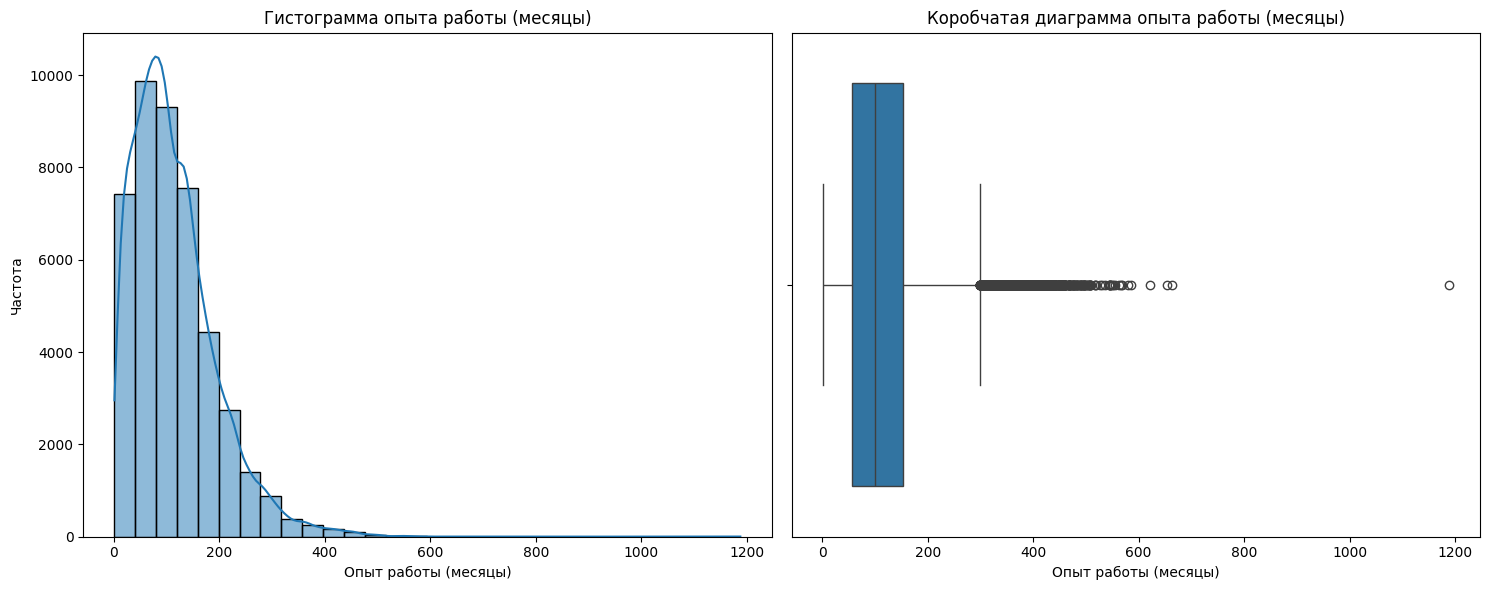

In [13]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные о соискателях
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

def get_experience(text):
    if pd.isna(text) or text == 'Не указано':
        return None

    arg_splitted = text.split()[:7]  # Разделяем текст на слова и берем первые 7
    year_list = ['год', 'года', 'лет']
    month_list = ['месяц', 'месяца', 'месяцев']

    years = 0
    months = 0

    for index, element in enumerate(arg_splitted):
        if element in year_list:
            years = int(arg_splitted[index - 1])  # Получаем число перед словом "год"
        elif element in month_list:
            months = int(arg_splitted[index - 1])  # Получаем число перед словом "месяц"

    return int(years * 12 + months)  # Возвращаем общий опыт в месяцах

# Применяем функцию к столбцу 'Опыт работы'
df['Опыт работы (месяцы)'] = df['Опыт работы'].apply(get_experience)

# Удаляем пустые значения для анализа
experience_months = df['Опыт работы (месяцы)'].dropna()

# Находим моду, предельные значения и интервал
mode_experience = experience_months.mode()[0]
min_experience = experience_months.min()
max_experience = experience_months.max()
q1 = experience_months.quantile(0.25)
q3 = experience_months.quantile(0.75)
iqr = q3 - q1

# Определяем границы для выявления аномалий
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = experience_months[(experience_months < lower_bound) | (experience_months > upper_bound)]

# Выводим результаты
display(experience_months.describe())
print(f'Мода распределения: {mode_experience} месяцев')
print(f'Предельные значения: {min_experience} - {max_experience} месяцев')
print(f'Интервал большинства соискателей: {q1} - {q3} месяцев')
print(f'Аномальные значения: {outliers.tolist()}')

# Построение гистограммы и коробчатой диаграммы
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма
sns.histplot(experience_months, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Гистограмма опыта работы (месяцы)')
axes[0].set_xlabel('Опыт работы (месяцы)')
axes[0].set_ylabel('Частота')

# Коробчатая диаграмма
sns.boxplot(x=experience_months, ax=axes[1])
axes[1].set_title('Коробчатая диаграмма опыта работы (месяцы)')
axes[1].set_xlabel('Опыт работы (месяцы)')

plt.tight_layout()
plt.show()

- Гистограмма показывает, что распределение опыта работы имеет ярко выраженный правый скос, то есть большинство людей имеют небольшой опыт работы (менее 200 месяцев), а количество людей с большим опытом работы (более 400 месяцев) постепенно уменьшается.
- Пик распределения находится в районе 100 месяцев.
- На гистограмме можно увидеть выбросы – точки с очень большим опытом работы.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import plotly.express as px
from IPython.display import display  # Для отображения DataFrame
import warnings

# Заглушить все предупреждения
warnings.filterwarnings("ignore")

# Чтение данных о соискателях и курсах валют
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
currency_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')

# Функция для извлечения числового значения зарплаты из строки
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])  # Извлекаем первую часть строки и преобразуем в float
    return salary

# Функция для извлечения валюты из строки зарплаты
def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')  # Извлекаем валюту и удаляем точки
    if curr == 'руб':
        return 'RUB'  # Преобразуем в RUB
    else:
        return currency_dict.get(curr, None)  # Возвращаем валюту из словаря

# Преобразуем даты в формат datetime для удобства работы
currency_rates['date'] = pd.to_datetime(currency_rates['date'], dayfirst=True).dt.date
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date

# Извлекаем зарплату и валюту из столбца 'ЗП'
df['ЗП (tmp)'] = df['ЗП'].apply(get_salary_num)
df['Валюта'] = df['ЗП'].apply(get_salary_currency)

# Объединяем таблицы по дате и валюте
merged = pd.merge(df, currency_rates, left_on=['Обновление резюме', 'Валюта'], 
                  right_on=['date', 'currency'], how='left')

# Заполняем пропуски в курсах валют и пропорциях значением 1 (по умолчанию)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)

# Пересчитываем зарплату в рубли с учетом пропорции и курса валют
merged['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']

# Удаляем временные столбцы, которые больше не нужны
merged.drop(['ЗП (tmp)', 'date', 'currency', 'per', 'time', 'vol'], axis=1, inplace=True)

# Фильтруем соискателей с зарплатой больше 1 миллиона рублей
high_salary_df = merged[merged['ЗП (руб)'] > 1e6]

# Подсчитываем количество соискателей с желаемой зарплатой больше 1 миллиона
count_high_salary = high_salary_df.shape[0]

print(f"Количество соискателей с желаемой зарплатой больше 1 миллиона рублей: {count_high_salary}")

# Выводим количество соискателей с желаемой зарплатой больше 1 миллиона рублей
display(high_salary_df)  # Показываем DataFrame с высокими зарплатами

# Строим гистограмму с помощью plotly.express для визуализации распределения зарплат
fig = px.histogram(
    data_frame=merged,  # Используем объединенный DataFrame
    x='ЗП (руб)',  # Ось X - зарплата в рублях
    title='Распределение желаемой з/п соискателей',  # Заголовок графика
    histnorm='percent',  # Нормализация по процентам
    width=500,  # Ширина графика
    marginal='box'  # Добавляем боксовую диаграмму для дополнительных статистик
)
fig.show()  # Отображаем график


C:\Users\ilya2\AppData\Local\Temp\ipykernel_21188\1701120162.py:30: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Количество соискателей с желаемой зарплатой больше 1 миллиона рублей: 5


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Валюта,close,proportion,ЗП (руб)
6931,"Мужчина , 31 год , родился 31 мая 1987",380000 USD,"Программирование, Разработка или Системный адм...","Алматы , готов к переезду (Россия, Казахстан, ...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...","Опыт работы 9 лет 7 месяцев Программирование,...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,"Высшее образование 2014 Университет «Туран», ...",2019-04-22,Не указано,USD,63.9602,1.0,24304876.0
28253,"Мужчина , 39 лет , родился 31 мая 1979",3000000 руб.,"Руководитель IT проектов, Роботизация, Автомат...","Москва , м. Щелковская , готов к переезду (Бе...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, вахтовый метод, уд...",Опыт работы 23 года 4 месяца Руководитель IT ...,HAMSTER ROBOTICS,Заместитель директора,Высшее образование 2019 Московский финансово-...,2019-04-27,Имеется собственный автомобиль,RUB,1.0000,1.0,3000000.0
39191,"Мужчина , 29 лет , родился 21 апреля 1990",120000 USD,Специалист по IT,"Актобе , готов к переезду , готов к командировкам",полная занятость,полный день,Опыт работы 8 лет 2 месяца Специалист по IT 1...,"ТОО ""AMS""",Системный администратор,Среднее специальное образование 2009 Экономика...,2019-04-22,Не указано,USD,63.9602,1.0,7675224.0
41924,"Мужчина , 24 года , родился 27 декабря 1994",1750000 руб.,Project manager,"Москва , м. Киевская , не готов к переезду , ...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы 3 года 3 месяца Project manager 1...,Тинькофф Банк,Технолог автоматизации бизнес-процессов,Неоконченное высшее образование 2020 Московск...,2019-04-22,Не указано,RUB,1.0000,1.0,1750000.0
43134,"Мужчина , 38 лет , родился 10 февраля 1981",2500000 руб.,Chief AI Officer,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 8 лет 1 месяц Chief AI Officer 2 ...,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,Высшее образование (Кандидат наук) 2006 Postgr...,2018-10-25,Не указано,RUB,1.0000,1.0,2500000.0


- Большинство соискателей желают получать зарплату в диапазоне от 0 до 1 миллиона рублей.
- Есть небольшое количество соискателей, которые ожидают зарплату более 10 миллионов рублей, а один соискатель - более 20 миллионов рублей.
- Распределение желаемой зарплаты сильно смещено в сторону низких значений, что указывает на то, что большинство соискателей ожидают зарплату в более низком диапазоне.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import plotly.express as px
import warnings

# Заглушить все предупреждения
warnings.filterwarnings("ignore")

# Загружаем данные о соискателях и курсы валют
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
currency_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')

# Функция для извлечения зарплаты и валюты
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    return 'RUB' if curr == 'руб' else currency_dict.get(curr, None)

# Преобразуем даты в формат datetime
currency_rates['date'] = pd.to_datetime(currency_rates['date'], dayfirst=True).dt.date
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date

# Извлекаем зарплату и валюту
df['ЗП (tmp)'] = df['ЗП'].apply(get_salary_num)
df['Валюта'] = df['ЗП'].apply(get_salary_currency)

# Соединяем таблицы по дате и валюте
df = pd.merge(df, currency_rates, left_on=['Обновление резюме', 'Валюта'], 
                    right_on=['date', 'currency'], how='left')

# Пересчитываем зарплату в рубли
df['ЗП (руб)'] = df['ЗП (tmp)'] * df['close'] 
# Фильтруем данные по желаемой зарплате
filtered_df = df[df['ЗП (руб)'] < 1e6]

# Определяем медианную зарплату по уровням образования
bar_data = filtered_df.groupby('Образование и ВУЗ', as_index=False).agg({'ЗП (руб)': 'median'})

# Определяем категорию образования с самой высокой медианной зарплатой
max_median_salary = bar_data['ЗП (руб)'].max()
best_education = bar_data[bar_data['ЗП (руб)'] == max_median_salary]['Образование и ВУЗ'].iloc[0]

# Строим график
fig = px.bar(
    data_frame=bar_data,
    x='Образование и ВУЗ',
    y='ЗП (руб)',
    title='Медианная ЗП по уровню образования'
)
fig.show()

print(f"Категория образования с самой высокой медианной зарплатой: {best_education}") 


C:\Users\ilya2\AppData\Local\Temp\ipykernel_21188\2296157930.py:25: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Категория образования с самой высокой медианной зарплатой: Высшее образование (Бакалавр) 2017 ZSEA FASMP, Software Engineering


- Заметен общий рост медианной зарплаты по всем уровням образования, с некоторыми колебаниями в отдельные годы.
- В целом, люди с высшим образованием получают больше, чем люди с неполным высшим, средним специальным, средним и начальным профессиональным.
- Несмотря на общий рост зарплат, для некоторых уровней образования рост был более выраженным, например, для людей с высшим образованием, а для других - более медленным, например, для людей со средним специальным образованием.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import plotly.express as px
import warnings

# Заглушить все предупреждения
warnings.filterwarnings("ignore")

# Загружаем данные о соискателях и курсы валют
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
currency_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')

# Функция для извлечения зарплаты и валюты
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    return 'RUB' if curr == 'руб' else currency_dict.get(curr, None)

# Преобразуем даты в формат datetime
currency_rates['date'] = pd.to_datetime(currency_rates['date'], dayfirst=True).dt.date
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date

# Извлекаем зарплату и валюту
df['ЗП (tmp)'] = df['ЗП'].apply(get_salary_num)
df['Валюта'] = df['ЗП'].apply(get_salary_currency)

# Соединяем таблицы по дате и валюте
df = pd.merge(df, currency_rates, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')

# Пересчитываем зарплату в рубли
df['ЗП (руб)'] = df['ЗП (tmp)'] * df['close']  

# Удаляем временные столбцы
df.drop(['ЗП (tmp)', 'date', 'currency', 'per', 'time', 'vol', 'proportion'], axis=1, inplace=True)

# Список городов-миллионников
million_cities = ['Москва', 'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
                  'Казань', 'Челябинск', 'Омск', 'Самара', 
                  'Ростов-на-Дону', 'Уфа', 'Красноярск', 
                  'Пермь', 'Воронеж', 'Волгоград']

# Приводим список городов к нижнему регистру для сравнения
million_cities_lower = [city.lower() for city in million_cities]

# Извлекаем только название города
df['Город'] = df['Город, переезд, командировки'].str.split(',').str[0].str.strip()

# Приводим названия городов к нижнему регистру для сравнения
df['Город'] = df['Город'].str.lower()

# Проверяем, к какой категории относится город
df['Категория города'] = df['Город'].apply(
    lambda x: x if x in million_cities_lower else 'Другие'
)

# Фильтруем данные по желаемой зарплате
filtered_df = df[df['ЗП (руб)'] < 1e6]

# Строим диаграмму распределения желаемой зарплаты по городам
fig = px.box(
    filtered_df,
    x='Категория города',
    y='ЗП (руб)',
    title='Распределение желаемой заработной платы по городам'
)
fig.show()

# Определяем город с максимальной желаемой зарплатой
city_data = filtered_df.groupby('Город', as_index=False).agg({'ЗП (руб)': 'max'})
max_salary_city = city_data[city_data['ЗП (руб)'] == city_data['ЗП (руб)'].max()]['Город'].iloc[0]

print(f'Город с максимальной желаемой зарплатой: {max_salary_city}')

C:\Users\ilya2\AppData\Local\Temp\ipykernel_21188\3101862128.py:25: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Город с максимальной желаемой зарплатой: киев


- Самая высокая медианная желаемая зарплата в Москве.
- Самая низкая медианная желаемая зарплата в Воронеже.
- В большинстве городов медианная желаемая зарплата находится в диапазоне от 100 000 до 300 000 рублей.
- В некоторых городах (например, Екатеринбург, Челябинск, Самара) наблюдаются отдельные выбросы с очень высокой желаемой зарплатой.
- В целом распределение желаемой зарплаты в разных городах имеет довольно большой разброс.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
import pandas as pd
import plotly.express as px
import warnings

# Заглушить все предупреждения
warnings.filterwarnings("ignore")

# Загружаем данные о соискателях 
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';') 
# Загружаем курсы валют 
currency_rates = pd.read_csv('data/ExchangeRates.csv', sep=',') 

# Функция для извлечения зарплаты и валюты 
def get_salary_num(arg): 
    try: 
        salary = float(arg.split(' ')[0]) 
        return salary 
    except (ValueError, IndexError): 
        return 0  # Вернуть 0 в случае ошибки 

def get_salary_currency(arg): 
    currency_dict = { 
        'USD': 'USD', 'KZT': 'KZT', 
        'грн': 'UAH', 'белруб': 'BYN', 
        'EUR': 'EUR', 'KGS': 'KGS', 
        'сум': 'UZS', 'AZN': 'AZN' 
    } 
    try: 
        curr = arg.split(' ')[1].replace('.', '') 
        return 'RUB' if curr == 'руб' else currency_dict.get(curr, None) 
    except IndexError: 
        return None  # Вернуть None, если не удается извлечь валюту 

# Преобразуем даты в формат datetime 
currency_rates['date'] = pd.to_datetime(currency_rates['date'], dayfirst=True).dt.date 
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date 

# Извлекаем зарплату и валюту 
df['ЗП (tmp)'] = df['ЗП'].apply(get_salary_num) 
df['Валюта'] = df['ЗП'].apply(get_salary_currency) 

# Соединяем таблицы по дате и валюте 
df = pd.merge(df, currency_rates, left_on=['Обновление резюме', 'Валюта'],  
                    right_on=['date', 'currency'], how='left') 

# Пересчитываем зарплату в рубли 
df['ЗП (руб)'] = df['ЗП (tmp)'] * df['close']   

# Удаляем временные столбцы 
df.drop(['ЗП (tmp)', 'date', 'currency', 'per', 'time', 'vol', 'proportion'], axis=1, inplace=True) 

# Извлекаем готовность к командировкам и переезду
df['Готов к командировкам'] = df['Город, переезд, командировки'].str.contains('готов к командировкам', na=False)
df['Готов к переезду'] = df['Город, переезд, командировки'].str.contains('готов к переезду', na=False)

# Удаляем строки с отсутствующими значениями в столбце ЗП (руб)
df = df.dropna(subset=['ЗП (руб)'])

# Фильтруем значения з/п больше 1 миллиона для того, чтобы убрать выбросы
df = df[df['ЗП (руб)'] < 1_000_000]

# Создаем новый DataFrame для графиков
bar_data = pd.DataFrame({
    'Категория': [
        'Готов к командировкам',
        'Не готов к командировкам',
        'Готов к переезду',
        'Не готов к переезду'
    ],
    'ЗП (руб)': [
        df[df['Готов к командировкам']]['ЗП (руб)'].median(),
        df[~df['Готов к командировкам']]['ЗП (руб)'].median(),
        df[df['Готов к переезду']]['ЗП (руб)'].median(),
        df[~df['Готов к переезду']]['ЗП (руб)'].median()
    ]
})

# Проверяем наличие данных для построения графика
if not bar_data.empty:
    # Строим график с яркими цветами
    fig = px.bar(
        data_frame=bar_data,
        y='Категория',
        x='ЗП (руб)',
        title='Медианная з/п по готовности к командировкам и переезду',
        color='Категория',
        orientation='h',
        color_discrete_sequence=px.colors.qualitative.Plotly  # Яркие цвета
    )
    
    fig.show()
else:
    print("Нет данных для построения графика.")

C:\Users\ilya2\AppData\Local\Temp\ipykernel_21188\3163201315.py:31: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



- Готовые к командировкам зарабатывают самую высокую медианную зарплату - 65 тысяч рублей.
- Готовые к переезду зарабатывают вторую по величине зарплату - 65 тысяч рублей.
- Не готовые к командировкам зарабатывают 55 тысяч рублей.
- Не готовые к переезду зарабатывают самую низкую медианную зарплату - 45 тысяч рублей.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [4]:
import pandas as pd
import plotly.express as px
import re
import warnings

# Заглушить все предупреждения
warnings.filterwarnings("ignore")

# Загрузка данных
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
currency_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')

# Определение функций для обработки зарплаты и валюты
def get_salary_num(salary_str):
    return float(salary_str.split()[0].replace(' ', '').replace('₽', ''))

def get_salary_currency(salary_str):
    return salary_str.split()[-1]

# Преобразование дат
currency_rates['date'] = pd.to_datetime(currency_rates['date'], dayfirst=True).dt.date
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date

# Извлечение зарплаты и валюты
df['ЗП (tmp)'] = df['ЗП'].apply(get_salary_num)
df['Валюта'] = df['ЗП'].apply(get_salary_currency)

# Объединение таблиц по дате и валюте
df = pd.merge(df, currency_rates, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')

# Пересчет зарплаты в рубли
df['ЗП (руб)'] = df['ЗП (tmp)'] * df['close']

# Удаление временных столбцов
df.drop(['ЗП (tmp)', 'date', 'currency', 'per', 'time', 'vol', 'proportion'], axis=1, inplace=True)

# Удаление строк с отсутствующими значениями в столбце ЗП (руб)
df = df.dropna(subset=['ЗП (руб)'])

# Фильтрация значений зарплаты больше 1 миллиона
df = df[df['ЗП (руб)'] < 1_000_000]

# Разделяем столбец "Пол, возраст" на два столбца  
df[['Пол', 'Возраст']] = df['Пол, возраст'].str.split(', ', n=1, expand=True)

# Функция для извлечения возраста 
def extract_age(text): 
    if pd.isna(text) or text == 'Не указано':  # Проверяем на NaN и 'Не указано'
        return None 
    
    year_splitted = text.split(' ') 
    years_list = ['год', 'года', 'лет'] 
    life_years = None  # Инициализируем переменную как None
    
    for index, item in enumerate(year_splitted): 
        if item in years_list: 
            try:
                life_years = int(year_splitted[index - 1])  # Пробуем преобразовать в int
                break  # Прерываем цикл, если нашли возраст
            except (ValueError, IndexError):
                continue  # Игнорируем ошибки и продолжаем
    
    return life_years  # Возвращаем найденный возраст или None

# Применяем функцию к столбцу 'Возраст' 
df['Возраст'] = df['Возраст'].apply(extract_age) 

# Функция для извлечения информации об образовании
def extract_education_info(row):
    words = row.split()
    education_info = []
    
    for i, word in enumerate(words):
        if word.lower() == 'образование':
            # Берем предыдущее значение, если оно есть
            if i > 0:
                education_info.append(words[i - 1])  # Предыдущее значение
    
    # Убираем числа из полученной информации об образовании
    clean_education_info = [re.sub(r'd+', '', edu).strip() for edu in education_info]
    
    return ' '.join(clean_education_info)

# Применяем функцию к столбцу 'Образование и ВУЗ'
df['Образование'] = df['Образование и ВУЗ'].apply(extract_education_info)

# Получаем уникальные значения образования без чисел
unique_education = df['Образование'].unique()

# Выводим уникальные значения
print("Уникальные значения образования (без чисел):")
print(unique_education)

# Построение сводной таблицы 
pivot_table = df.pivot_table(values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median')

# Построение тепловой карты 
fig = px.imshow(pivot_table,  
                 labels=dict(x="Образование", y="Возраст", color="Медианная ЗП (руб)"), 
                 x=pivot_table.columns, 
                 y=pivot_table.index, 
                 color_continuous_scale='Viridis') 
fig.update_layout(title='Тепловая карта медианной желаемой зарплаты по возрасту и образованию') 
fig.show() 

# Анализ наибольшего карьерного роста 
growth_rate = pivot_table.pct_change().mean() 
fastest_growth_education = growth_rate.idxmax() 
print(f'Категория образования с самым быстрым карьерным ростом: {fastest_growth_education}')

Уникальные значения образования (без чисел):
['Высшее' 'высшее' 'специальное' 'Среднее' 'Высшее среднее'
 'Высшее художественное']


Категория образования с самым быстрым карьерным ростом: высшее


- Медианная зарплата растет с возрастом.
- Самая высокая медианная зарплата у людей с высшим образованием в возрасте 70 лет.
- Люди с высшим художественным образованием зарабатывают меньше остальных.
- Люди с высшим образованием зарабатывают больше, чем люди со средним специальным образованием.
- У людей с высшим средним образованием медианная зарплата более разбросана.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

Text(0.5, 1.0, 'Зависимость опыта работы от возраста')

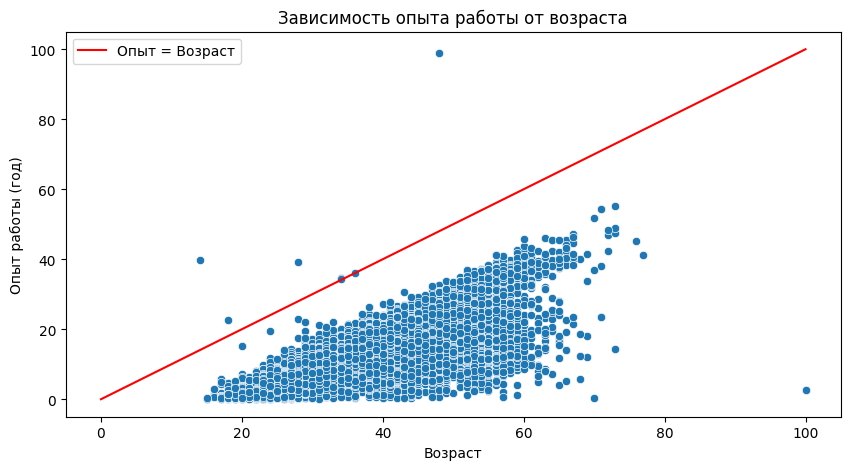

In [36]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные о соискателях
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Разделяем столбец "Пол, возраст" на два столбца
df[['Пол', 'Возраст']] = df['Пол, возраст'].str.split(', ', n=1, expand=True)

# Функция для извлечения возраста 
def extract_age(text): 
    if pd.isna(text) or text == 'Не указано':  # Проверяем на NaN и 'Не указано'
        return None 
    
    year_splitted = text.split(' ') 
    years_list = ['год', 'года', 'лет'] 
    life_years = None  # Инициализируем переменную как None
    
    for index, item in enumerate(year_splitted): 
        if item in years_list: 
            try:
                life_years = int(year_splitted[index - 1])  # Пробуем преобразовать в int
                break  # Прерываем цикл, если нашли возраст
            except (ValueError, IndexError):
                continue  # Игнорируем ошибки и продолжаем
    
    return life_years  # Возвращаем найденный возраст или None

# Применяем функцию к столбцу 'Возраст' 
df['Возраст'] = df['Возраст'].apply(extract_age) 

# Функция для получения опыта работы в месяцах
def get_experience(text):
    if pd.isna(text) or text == 'Не указано':
        return None

    arg_splitted = text.split()[:7]  # Разделяем текст на слова и берем первые 7
    year_list = ['год', 'года', 'лет']
    month_list = ['месяц', 'месяца', 'месяцев']

    years = 0
    months = 0

    for index, element in enumerate(arg_splitted):
        if element in year_list:
            years = int(arg_splitted[index - 1])  # Получаем число перед словом "год"
        elif element in month_list:
            months = int(arg_splitted[index - 1])  # Получаем число перед словом "месяц"

    return int(years * 12 + months)  # Возвращаем общий опыт в месяцах

# Применяем функцию к столбцу 'Опыт работы'
df['Опыт работы (месяцы)'] = df['Опыт работы'].apply(get_experience)

fig = plt.figure(figsize=(10, 5))
scatter_data = df.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяцы)']/12
sns.lineplot(x=[0, 100], y=[0, 100], color='red', label='Опыт = Возраст')
ax = sns.scatterplot(
    data=scatter_data, 
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста')

- Опыт работы в большинстве случаев растет с возрастом, но не всегда линейно.
- Есть люди, которые работают долго, но относительно молоды (например, в районе 20 лет).
- Есть и люди, которые имеют большой опыт работы, но при этом достаточно молоды (например, около 40 лет).
- Также наблюдается небольшое количество людей, которые имеют очень большой опыт работы (около 100 лет), но при этом, по всей видимости, имеют возраст около 20 лет.
В целом, график показывает, что опыт работы и возраст взаимосвязаны, но эта связь не является строго линейной.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


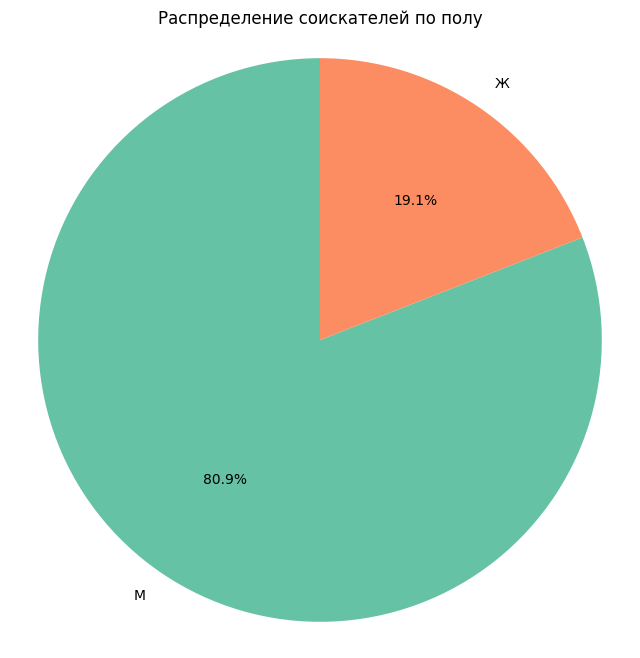

'Процент женских резюме: 19.07%'

In [39]:
# Импортируем необходимые библиотеки 
import pandas as pd 
import re 
import matplotlib.pyplot as plt 

# Загружаем данные 
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';') 

# Функция преобразования признака "Пол, возраст" 
def extract_gender_age(text): 
    """ 
    Извлекает пол и возраст из строки. 
 
    Args: 
        text: Строка, содержащая информацию о поле, возрасте и дате рождения. 
 
    Returns: 
        Кортеж (пол, возраст). 
    """ 
    words = text.split(', ') 
    gender = 'М' if 'Мужчина' in words[0] else 'Ж' 
     
    # Используем регулярное выражение для извлечения возраста 
    match = re.search(r'd+', words[1]) 
    age = int(match.group(0)) if match else None 
     
    return gender, age 

# Создаем новые признаки "Пол" и "Возраст" 
df['Пол'], df['Возраст'] = zip(*df['Пол, возраст'].apply(extract_gender_age)) 

# Удаляем признак "Пол, возраст" 
df.drop('Пол, возраст', axis=1, inplace=True) 

# Подсчитываем количество резюме по полу
gender_counts = df['Пол'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Распределение соискателей по полу')
plt.axis('equal')  # Сделать круговой график
plt.show()

# Вычисляем процент женских резюме
count_female = gender_counts.get('Ж', 0)
percent_female = (count_female / len(df)) * 100
percent_female = round(percent_female, 2)

# Вычисляем средний возраст
average_age = round(df['Возраст'].mean(), 1)

# Выводим результаты
display(f"Процент женских резюме: {percent_female}%") 


Из диаграммы видно, что среди соискателей преобладают мужчины (80.9%), тогда как женщин (19.1%) значительно меньше.

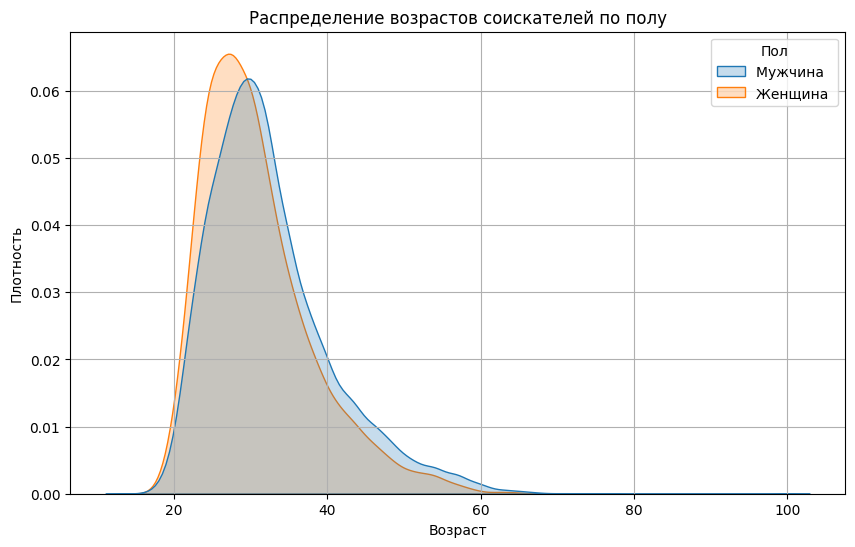

In [44]:

# Импортируем необходимые библиотеки 
import pandas as pd 
import numpy as np 
import re  
import matplotlib.pyplot as plt 
import seaborn as sns 

# Загружаем данные о соискателях 
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';') 

# Функция для извлечения пола и возраста из строки
def extract_gender(text):  
    """  
    Извлекает пол и возраст из строки.  
  
    Args:  
        text: Строка, содержащая информацию о поле, возрасте и дате рождения.  
  
    Returns:  
        Кортеж (пол, возраст).  
    """  
    words = text.split(', ')  
    gender = 'М' if 'Мужчина' in words[0] else 'Ж'  
      
    return gender

# Создаем новые признаки "Пол" и "Возраст"  
df['Пол'] = (df['Пол, возраст'].apply(extract_gender))  

# Разделяем столбец "Пол, возраст" на два столбца
df[['Пол', 'Возраст']] = df['Пол, возраст'].str.split(', ', n=1, expand=True)

# Функция для извлечения возраста 
def extract_age(text): 
    if pd.isna(text) or text == 'Не указано':  # Проверяем на NaN и 'Не указано'
        return None 
    
    year_splitted = text.split(' ') 
    years_list = ['год', 'года', 'лет'] 
    life_years = None  # Инициализируем переменную как None
    
    for index, item in enumerate(year_splitted): 
        if item in years_list: 
            try:
                life_years = int(year_splitted[index - 1])  # Пробуем преобразовать в int
                break  # Прерываем цикл, если нашли возраст
            except (ValueError, IndexError):
                continue  # Игнорируем ошибки и продолжаем
    
    return life_years  # Возвращаем найденный возраст или None

# Применяем функцию к столбцу 'Возраст' 
df['Возраст'] = df['Возраст'].apply(extract_age) 

# График распределения возрастов по полу
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Возраст', hue='Пол', fill=True, common_norm=False)
plt.title('Распределение возрастов соискателей по полу')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.grid()
plt.show()

- Пик распределения возрастов как для мужчин, так и для женщин приходится на возраст около 30 лет.
- Распределение возрастов у мужчин более равномерное, чем у женщин.
- У женщин наблюдается большее количество соискателей в возрасте от 20 до 40 лет, по сравнению с мужчинами.
- У мужчин пик распределения более выражен, чем у женщин, что может говорить о более высоком уровне конкуренции среди мужчин в более молодом возрасте.
- У женщин наблюдается большее количество соискателей старше 40 лет, чем у мужчин.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [2]:
import pandas as pd

# Загружаем данные о соискателях
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

duplicates = data[data.duplicated(subset=data.columns)]
data = data.drop_duplicates()
print(duplicates.shape[0])

153


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
import pandas as pd

# Загружаем данные о соискателях
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

# Находим дубликаты
duplicates = df[df.duplicated(subset=df.columns)]

# Удаляем дубликаты
df.drop_duplicates(inplace=True)

# Выводим информацию о числе пропусков в столбцах
print(df.isnull().sum())

# Выводим количество пропусков в столбце "Опыт работы (месяц)"
print(f"Пропусков в столбце 'Опыт работы': {df['Опыт работы'].isnull().sum()}")

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [3]:
import pandas as pd 
import numpy as np 
import re 
import warnings

# Заглушить все предупреждения
warnings.filterwarnings("ignore")

# Загружаем данные 
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';') 

def get_experience(arg): 
    """ 
    Извлекает общий опыт работы в месяцах из строки. 

    Args: 
        arg: Строка, содержащая информацию о опыте работы. 

    Returns: 
        Общий опыт работы в месяцах или NaN. 
    """ 
    if pd.isna(arg) or arg == 'Не указано': 
        return np.nan 
    year_words = ['год', 'года', 'лет'] 
    month_words = ['месяц', 'месяца', 'месяцев'] 
    arg_splitted = arg.split(' ')[:7] 
    years = 0 
    months = 0 
    for index, item in enumerate(arg_splitted): 
        if item in year_words: 
            years = int(arg_splitted[index - 1]) 
        if item in month_words: 
            months = int(arg_splitted[index - 1]) 
    return int(years * 12 + months) 

# Применяем функцию к столбцу "Опыт работы" и создаем новый столбец "Опыт работы (месяц)" 
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience) 

# Удаляем строки с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"  
df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], inplace=True)  

# Заполняем пропуски в столбце "Опыт работы (месяц)" медианным значением  
df['Опыт работы (месяц)'].fillna(df['Опыт работы (месяц)'].median(), inplace=True)  

# Считаем среднее значение  
mean_experience = round(df['Опыт работы (месяц)'].mean())  

# Выводим результаты  
print(f"Среднее значение 'Опыт работы (месяц)' после заполнения пропусков: {mean_experience}")

Среднее значение 'Опыт работы (месяц)' после заполнения пропусков: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [5]:
# Импорт необходимых библиотек 
import pandas as pd 
import warnings 

# Заглушить все предупреждения 
warnings.filterwarnings("ignore") 

# Чтение данных о соискателях и курсах валют 
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';') 
currency_rates = pd.read_csv('data/ExchangeRates.csv', sep=',') 

# Функция для извлечения числового значения зарплаты из строки 
def get_salary_num(arg): 
    salary = float(arg.split(' ')[0])  # Извлекаем первую часть строки и преобразуем в float 
    return salary 

# Функция для извлечения валюты из строки зарплаты 
def get_salary_currency(arg): 
    currency_dict = { 
        'USD': 'USD', 'KZT': 'KZT', 
        'грн': 'UAH', 'белруб': 'BYN', 
        'EUR': 'EUR', 'KGS': 'KGS', 
        'сум': 'UZS', 'AZN': 'AZN' 
    } 
    curr = arg.split(' ')[1].replace('.', '')  # Извлекаем валюту и удаляем точки 
    if curr == 'руб': 
        return 'RUB'  # Преобразуем в RUB 
    else: 
        return currency_dict.get(curr, None)  # Возвращаем валюту из словаря 

# Преобразуем даты в формат datetime для удобства работы 
currency_rates['date'] = pd.to_datetime(currency_rates['date'], dayfirst=True).dt.date 
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date 

# Извлекаем зарплату и валюту из столбца 'ЗП' 
df['ЗП (tmp)'] = df['ЗП'].apply(get_salary_num) 
df['Валюта'] = df['ЗП'].apply(get_salary_currency) 

# Объединяем таблицы по дате и валюте 
merged = pd.merge(df, currency_rates, left_on=['Обновление резюме', 'Валюта'],  
                  right_on=['date', 'currency'], how='left') 

# Заполняем пропуски в курсах валют и пропорциях значением 1 (по умолчанию) 
merged['close'] = merged['close'].fillna(1) 
merged['proportion'] = merged['proportion'].fillna(1) 

# Пересчитываем зарплату в рубли с учетом пропорции и курса валют 
merged['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion'] 

# Удаляем временные столбцы, которые больше не нужны 
merged.drop(['ЗП (tmp)', 'date', 'currency', 'per', 'time', 'vol'], axis=1, inplace=True) 

# Находим выбросы по зарплате
outliers = merged[(merged['ЗП (руб)'] > 1e6) | (merged['ЗП (руб)'] < 1e3)] 

# Удаляем выбросы из основного DataFrame
cleaned_data = merged.drop(outliers.index)

# Подсчитываем количество выбросов
count_outliers = outliers.shape[0]

# Выводим результаты
print(f"Количество выбросов (резюме с ЗП < 1000 или > 1 миллиона рублей): {count_outliers}")


Количество выбросов (резюме с ЗП < 1000 или > 1 миллиона рублей): 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [6]:
# Импортируем необходимые библиотеки 
import pandas as pd 
import numpy as np 

# Загружаем данные о соискателях 
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';') 

# Разделяем столбец "Пол, возраст" на два столбца 
df[['Пол', 'Возраст']] = df['Пол, возраст'].str.split(', ', n=1, expand=True) 

# Функция для извлечения возраста  
def extract_age(text):  
    if pd.isna(text) or text == 'Не указано':  # Проверяем на NaN и 'Не указано' 
        return None  
     
    year_splitted = text.split(' ')  
    years_list = ['год', 'года', 'лет']  
    life_years = None  # Инициализируем переменную как None 
     
    for index, item in enumerate(year_splitted):  
        if item in years_list:  
            try: 
                life_years = int(year_splitted[index - 1])  # Пробуем преобразовать в int 
                break  # Прерываем цикл, если нашли возраст 
            except (ValueError, IndexError): 
                continue  # Игнорируем ошибки и продолжаем 
     
    return life_years  # Возвращаем найденный возраст или None 

# Применяем функцию к столбцу 'Возраст'  
df['Возраст'] = df['Возраст'].apply(extract_age)  

# Функция для получения опыта работы в месяцах 
def get_experience(text): 
    if pd.isna(text) or text == 'Не указано': 
        return None 

    arg_splitted = text.split()[:7]  # Разделяем текст на слова и берем первые 7 
    year_list = ['год', 'года', 'лет'] 
    month_list = ['месяц', 'месяца', 'месяцев'] 

    years = 0 
    months = 0 

    for index, element in enumerate(arg_splitted): 
        if element in year_list: 
            years = int(arg_splitted[index - 1])  # Получаем число перед словом "год" 
        elif element in month_list: 
            months = int(arg_splitted[index - 1])  # Получаем число перед словом "месяц" 

    return int(years * 12 + months)  # Возвращаем общий опыт в месяцах 

# Применяем функцию к столбцу 'Опыт работы' 
df['Опыт работы (месяцы)'] = df['Опыт работы'].apply(get_experience) 

# Находим резюме с опытом работы больше возраста
outliers = df[df['Опыт работы (месяцы)'] > df['Возраст'] * 12]

# Удаляем выбросы из основного DataFrame
cleaned_data = df.drop(outliers.index)

# Подсчитываем количество выбросов
count_outliers = outliers.shape[0]

# Выводим результаты
print(f"Количество выбросов (опыт работы превышает возраст): {count_outliers}")


Количество выбросов (опыт работы превышает возраст): 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

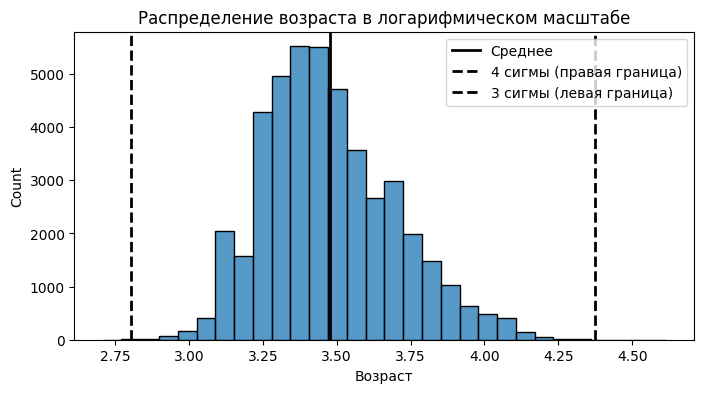

Количество выбросов: 4
Выбросы по возрасту:
            Пол  Возраст
29098  Мужчина        14
31137  Мужчина        15
32950  Мужчина        15
33654  Мужчина       100


In [7]:
# Импортируем необходимые библиотеки  
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Загружаем данные о соискателях  
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')  

# Разделяем столбец "Пол, возраст" на два столбца  
df[['Пол', 'Возраст']] = df['Пол, возраст'].str.split(', ', n=1, expand=True)  

# Функция для извлечения возраста   
def extract_age(text):   
    if pd.isna(text) or text == 'Не указано':  # Проверяем на NaN и 'Не указано'  
        return None   
      
    year_splitted = text.split(' ')   
    years_list = ['год', 'года', 'лет']   
    life_years = None  # Инициализируем переменную как None  
      
    for index, item in enumerate(year_splitted):   
        if item in years_list:   
            try:  
                life_years = int(year_splitted[index - 1])  # Пробуем преобразовать в int  
                break  # Прерываем цикл, если нашли возраст  
            except (ValueError, IndexError):  
                continue  # Игнорируем ошибки и продолжаем  
      
    return life_years  # Возвращаем найденный возраст или None  

# Применяем функцию к столбцу 'Возраст'   
df['Возраст'] = df['Возраст'].apply(extract_age)  

# Удаляем строки с отсутствующим возрастом
df = df[df['Возраст'].notna()]

# Строим распределение возраста в логарифмическом масштабе
fig, ax = plt.subplots(1, 1, figsize=(8, 4)) 
log_age = np.log(df['Возраст'] + 1) 
histplot = sns.histplot(log_age, bins=30, ax=ax) 
histplot.axvline(log_age.mean(), color='k', lw=2, label='Среднее') 
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='k', ls='--', lw=2, label='4 сигмы (правая граница)') 
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='k', ls='--', lw=2, label='3 сигмы (левая граница)') 
histplot.set_title('Распределение возраста в логарифмическом масштабе')
histplot.legend()

plt.show()

# Функция для поиска выбросов с использованием z-отклонения
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False): 
    if log_scale: 
        x = np.log(data[feature] + 1) 
    else: 
        x = data[feature] 
    mu = x.mean() 
    sigma = x.std() 
    lower_bound = mu - left * sigma 
    upper_bound = mu + right * sigma 
    outliers = data[(x < lower_bound) | (x > upper_bound)] 
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)] 
    return outliers, cleaned 

# Находим выбросы
outliers, cleaned_data = outliers_z_score_mod(df, 'Возраст', left=3, right=4, log_scale=True)

# Выводим количество выбросов и сами выбросы
print(f"Количество выбросов: {outliers.shape[0]}")
print("Выбросы по возрасту:")
print(outliers[['Пол', 'Возраст']])


- Распределение возраста соискателей имеет вид колоколообразной кривой, с пиком в районе 3,5. Это говорит о том, что большая часть соискателей находится в возрасте около 30 лет.
- Среднее значение возраста соискателей находится в точке 3,5, что соответствует возрасту около 30 лет.
- Границы 3 и 4 сигм отделяют область с максимальной концентрацией значений.
- На графике отсутствуют выбросы, т.е. значения, значительно отличающиеся от остальных.
- Большинство соискателей находятся в диапазоне от 28 до 38 лет, с максимальной концентрацией в районе 30 лет.

п.с. даже не представляю, что будет дальше. -_-